### In questo Notebook elaboriamo i dati ANKI dell'ultima corsa, letti direttamente dalla tabella MYSQL

In [1]:
import mysql.connector as sql
import pandas as pd
HOST = ' ubuntuserver140412-dashboariotnew-slhabiu8.srv.ravcloud.com'
db_connection = sql.connect(host=HOST, database='home1', user='anki', password='welcome1')

### Analisi Tempi Lap

In [2]:
dfLaps = pd.read_sql('SELECT * FROM laps WHERE raceId = (SELECT MAX(raceId) FROM laps)', 
                 con=db_connection)

In [3]:
dfLaps

,raceId,carName,lap,lapTime
0,253,Skull,1,31440
1,253,Skull,2,9620
2,253,Skull,3,7633
3,253,Skull,4,6594
4,253,Skull,5,7462
5,253,Skull,6,258072
6,253,Skull,7,9079
7,253,Skull,8,10999
8,253,Skull,9,9967
9,253,Skull,10,11058


In [4]:
# identifica le auto che hanno partecipato
cars = dfLaps['carName'].unique()

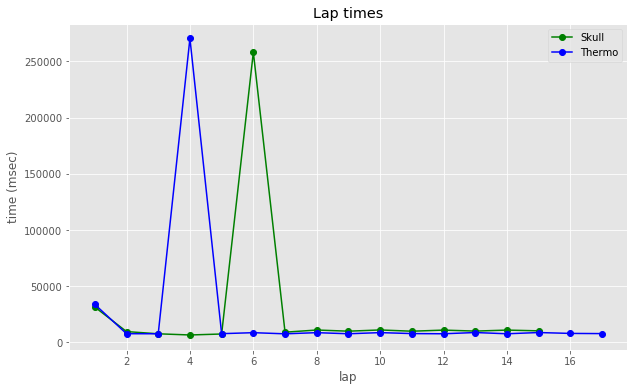

In [5]:
# fa il il plot dei tempi per lap
import matplotlib, matplotlib.pyplot as plt
matplotlib.style.use("ggplot")

color = ['green','blue','brown','red', 'black', 'yellow']
i = 0
plt.figure(figsize=(10,6))

for car in cars:
    xp = dfLaps.loc[dfLaps['carName'] == car]['lap']
    yp = dfLaps.loc[dfLaps['carName'] == car]['lapTime']
    plt.plot(xp, yp, "-o", color=color[i])
    i += 1

plt.xlabel("lap")
plt.ylabel("time (msec)")
plt.title("Lap times")
plt.legend(cars)
plt.show()

### Analisi velocità (speed)

In [6]:
# il filtro per selezionare l'ultima gara
dfSpeed = pd.read_sql('SELECT * FROM speed WHERE raceId = (SELECT MAX(raceId) FROM speed)', 
                      con=db_connection)

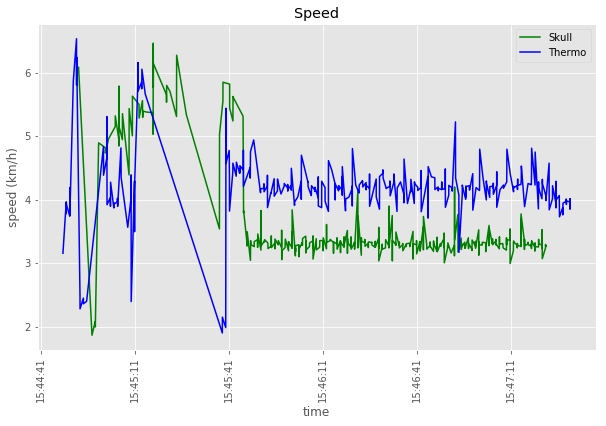

In [7]:
i = 0
matplotlib.style.use("ggplot")
plt.figure(figsize=(10,6))

for car in cars:
    xp = pd.to_datetime(dfSpeed.loc[dfSpeed['carName'] == car]['dTimeString'])
    # divide by 1000 to convert in km/h
    yp = dfSpeed.loc[dfSpeed['carName'] == car]['speed']/1000
    plt.plot(xp, yp, color=color[i])
    i += 1

plt.xlabel("time")
plt.xticks(rotation=90)
plt.ylabel("speed (km/h)")
plt.title("Speed")
plt.legend(cars)
plt.show()

### I dati di velocità hanno un rumore visibile... dobbiamo filtrare

In [8]:
import scipy.ndimage.filters

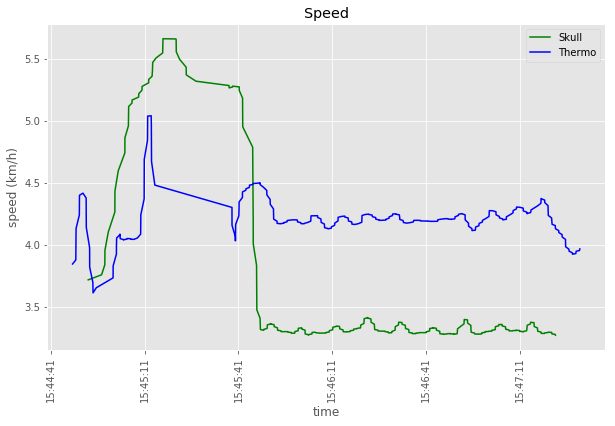

In [9]:
i = 0
matplotlib.style.use("ggplot")
plt.figure(figsize=(10,6))

for car in cars:
    xp = pd.to_datetime(dfSpeed.loc[dfSpeed['carName'] == car]['dTimeString'])
    yp = dfSpeed.loc[dfSpeed['carName'] == car]['speed']
    
    # applichiamo un filtro gaussiano
    filteredYp = scipy.ndimage.filters.gaussian_filter1d(yp, sigma=4)/1000
    
    plt.plot(xp, filteredYp, color=color[i])
    i += 1

plt.xlabel("time")
plt.xticks(rotation=90)
plt.ylabel("speed (km/h)")
plt.title("Speed")
plt.legend(cars)
plt.show()